In [4]:
from typing import TypedDict, List
import random
from langgraph.graph import StateGraph,START,END

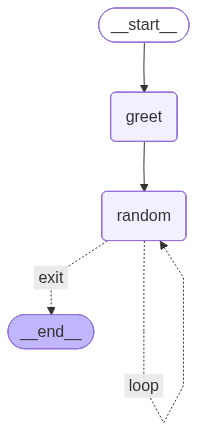

In [9]:
class AgentState(TypedDict):
  name:str
  numbers:List[int]
  counter:int

def greet_node(state:AgentState)->AgentState:
    """Simple node that greet the person"""
    state['name'] = f"Hi there, {state['name']}"
    state['counter'] = 0
    return state

def random_node(state:AgentState)->AgentState:
  "Simple node that generates the random number between 1 to 10"
  state['numbers'].append(random.randint(1,10))
  state['counter']+=1
  return state

def should_continue(state:AgentState)->AgentState:
  """Function that decides what to do next"""
  if state['counter']<5:
    return "loop"
  else:
    return "exit"

graph = StateGraph(AgentState)
graph.add_node("greet",greet_node)
graph.add_node("random",random_node)
graph.add_edge(START,"greet")
graph.add_edge("greet","random")
graph.add_conditional_edges(
    "random", #source node where this decision needs to be done
    should_continue, # funtion that helps to decide
    {
        "loop":"random",
        "exit":END
    }
)

graph.compile()


In [11]:
app=graph.compile()
app.invoke({"name":"Bob","numbers":[],"counter":-1})

{'name': 'Hi there, Bob', 'numbers': [7, 10, 9, 4, 8], 'counter': 5}